In [85]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [86]:

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

## 데이터 로드

In [87]:
df = pd.read_csv("/Users/ohheungchan/workspace/AI_Study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


이 데이터셋은 당뇨병 예측을 위한 데이터로, 각 피처(특징)들은 환자의 건강 정보와 관련된 데이터를 나타냅니다. 아래는 각 피처에 대한 설명입니다.

1. **Pregnancies (임신 횟수)**: 환자가 임신한 횟수를 나타냅니다. 이 값은 당뇨병 발병 가능성에 영향을 미칠 수 있습니다.

2. **Glucose (혈당 수치)**: 2시간 동안의 경구 포도당 내성 검사에서 측정된 혈당 수치를 나타냅니다. 혈당 수치는 당뇨병을 진단하는 주요 기준 중 하나입니다.

3. **BloodPressure (혈압)**: 환자의 이완기 혈압을 나타냅니다(단위: mmHg). 고혈압은 당뇨병과 관련된 중요한 위험 요인 중 하나입니다.

4. **SkinThickness (피부 두께)**: 삼두근 피부 두께를 측정한 값으로, 체지방량을 추정하는 지표로 사용됩니다(단위: mm). 이 값이 비만과 관련이 있을 수 있습니다.

5. **Insulin (인슐린 수치)**: 혈액에서 측정된 2시간 동안의 혈청 인슐린 수치(단위: μU/ml)를 나타냅니다. 인슐린 저항성이나 인슐린 분비량의 변화는 당뇨병과 관련이 있습니다.

6. **BMI (체질량지수)**: 체중(kg)을 신장의 제곱(m²)으로 나눈 값으로, 비만도를 나타냅니다. BMI는 당뇨병 발병 위험과 밀접한 관련이 있습니다.

7. **DiabetesPedigreeFunction (당뇨 유전적 계수)**: 가족력과 유전적 요인에 따른 당뇨병 발병 가능성을 나타내는 지표입니다. 값이 높을수록 가족 중 당뇨병 환자가 많거나 유전적 영향이 클 수 있습니다.

8. **Age (나이)**: 환자의 나이를 나타냅니다. 나이가 많을수록 당뇨병 발병 위험이 높아질 수 있습니다.

9. **Outcome (결과)**: 환자가 당뇨병을 가지고 있는지 여부를 나타냅니다. 1은 당뇨병이 있음을, 0은 당뇨병이 없음을 의미합니다.

이 데이터셋은 각 환자의 건강 정보를 바탕으로 당뇨병 발병 여부를 예측하는 데 사용됩니다.

Text(0.5, 1.0, 'Label')

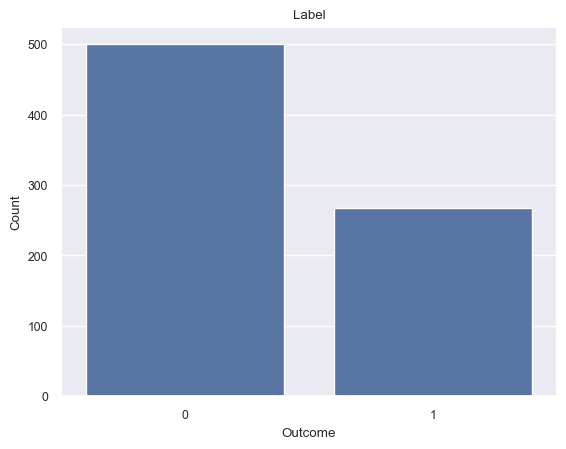

In [88]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Outcome")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Label")

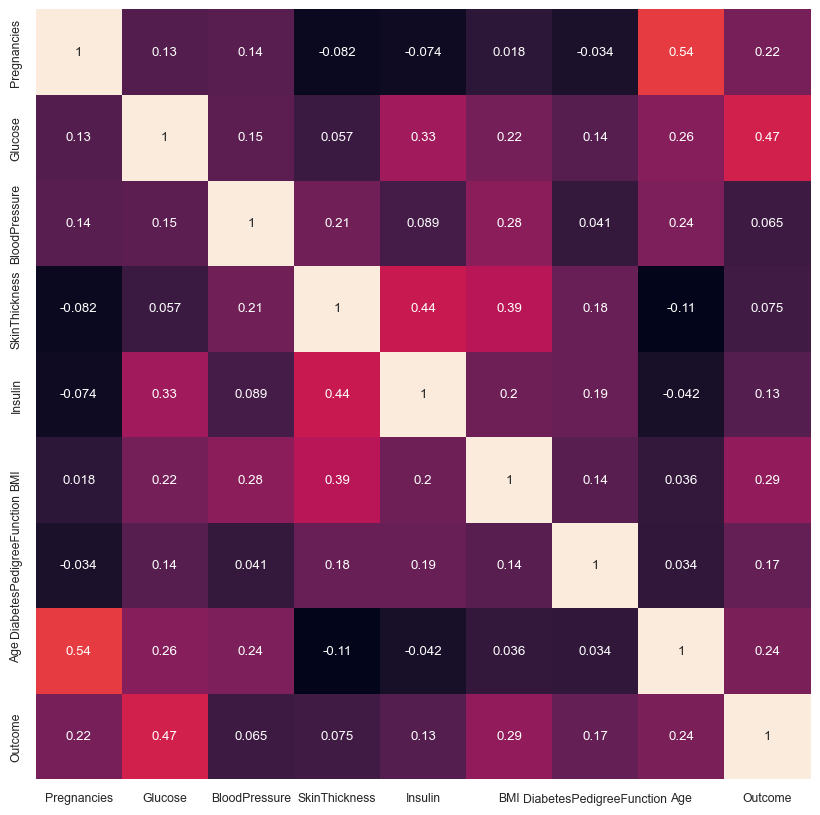

In [89]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## 전처리

In [90]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [91]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

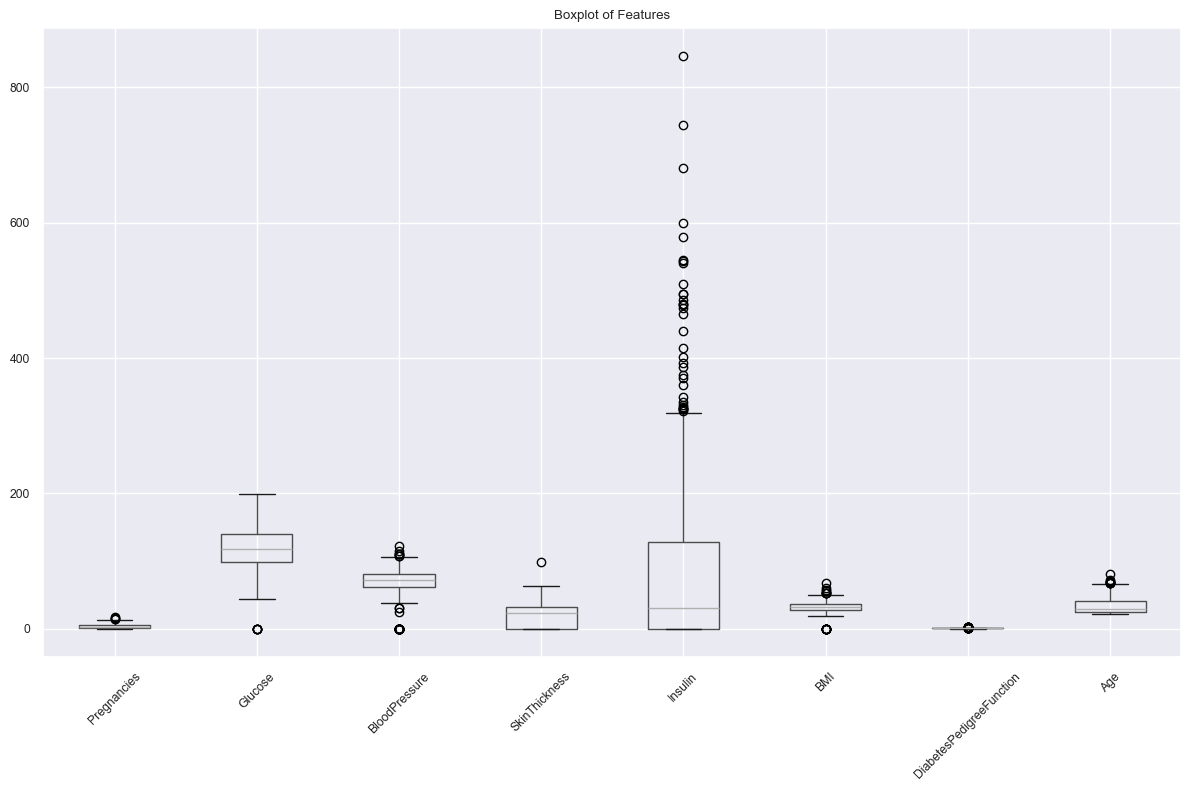

In [92]:
import matplotlib.pyplot as plt

# 박스플롯 그리기 (Outcome 피쳐는 제외)
plt.figure(figsize=(12, 8))
df.drop(columns='Outcome').boxplot()
plt.title('Boxplot of Features')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정

plt.show()

## 이상치 처리 방안
- BloodPressure, BMI가 0인것은 이상치로 판단하고 이상치 제거
- 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체

In [93]:
#  BloodPressure, BMI가 0인것은 이상치로 판단하고 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  729


In [94]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

### 데이터 편향을 해결하기 위해 smote사용

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])

In [96]:

y_resampled.value_counts()


Outcome
1    478
0    478
Name: count, dtype: int64

In [97]:
X_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35.000000,155.717557,33.600000,0.627000,50
1,1,85,66,29.000000,155.717557,26.600000,0.351000,31
2,8,183,64,29.186220,155.717557,23.300000,0.672000,32
3,1,89,66,23.000000,94.000000,28.100000,0.167000,21
4,0,137,40,35.000000,168.000000,43.100000,2.288000,33
...,...,...,...,...,...,...,...,...
951,3,84,80,31.247625,75.200135,35.859091,1.187750,28
952,4,190,68,30.621970,155.717557,32.482317,0.330829,26
953,3,164,70,18.210382,109.207637,31.242351,0.268000,28
954,9,149,86,47.817588,236.452763,37.600000,0.924752,50


In [98]:
X = X_resampled.values


In [99]:
import numpy as np
from collections import Counter

# split_sequence 함수 
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [100]:
# n_step 값 정의
n_step = 9

# X과 y을 시퀀스 형태로 변환
X, y = split_sequence(X,y_resampled,n_step)
print(f" data shape: {X.shape}, Labels shape: {y.shape}")


 data shape: (947, 9, 8), Labels shape: (947,)


In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape

((605, 9, 8), (190, 9, 8), (605,), (190,), (152, 9, 8), (152,))

In [102]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
n_timesteps, n_features

(9, 8)

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout

# CNN 모델 정의
model = Sequential()

# Conv1D 레이어 추가 (필터 32개, 커널 크기 3)
model.add(Conv1D(filters=32, kernel_size=3, activation='tanh', input_shape=(n_timesteps, n_features)))
model.add(BatchNormalization())  # Conv1D 후에 BatchNormalization 적용
model.add(Dropout(0.3))

# 추가 Conv1D 레이어 (필터 64개로 증가)
model.add(Conv1D(filters=64, kernel_size=2, activation='tanh'))
model.add(BatchNormalization())  # Conv1D 후에 BatchNormalization 적용
model.add(Dropout(0.3))

# 추가 Conv1D 레이어 (필터 128개로 증가)
model.add(Conv1D(filters=128, kernel_size=2, activation='tanh'))
model.add(BatchNormalization())  # Conv1D 후에 BatchNormalization 적용
model.add(Dropout(0.5))

# 출력층에 연결하기 위해 Flatten 레이어 사용
model.add(Flatten())

# Dense 레이어 추가
model.add(Dense(128, activation='tanh'))
model.add(BatchNormalization())  # Dense 레이어 후에 BatchNormalization 적용 (필요에 따라)

# 출력층 추가 (이진 분류 문제로 가정)
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 구조 출력
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 32)             800       
                                                                 
 batch_normalization_8 (Batc  (None, 7, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 7, 32)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             4160      
                                                                 
 batch_normalization_9 (Batc  (None, 6, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 6, 64)            

In [104]:
batch_size = 64

train_epochs = 100
history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-10-01 14:08:25.091389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.9105 - accuracy: 0.5124

2024-10-01 14:08:30.066264: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 6s 349ms/step - loss: 0.9105 - accuracy: 0.5124 - val_loss: 0.6882 - val_accuracy: 0.5526
Epoch 2/100
10/10 [==============================] - 0s 22ms/step - loss: 0.7532 - accuracy: 0.6033 - val_loss: 0.6221 - val_accuracy: 0.6382
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 0.6892 - accuracy: 0.6298 - val_loss: 0.5901 - val_accuracy: 0.6579
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6717 - accuracy: 0.6496 - val_loss: 0.5839 - val_accuracy: 0.6842
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6427 - accuracy: 0.6909 - val_loss: 0.6010 - val_accuracy: 0.6579
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6359 - accuracy: 0.6727 - val_loss: 0.5529 - val_accuracy: 0.7039
Epoch 7/100
10/10 [==============================] - 0s 15ms/step - loss: 0.5912 - accuracy: 0.6926 - val_loss: 0.5503 - val_accuracy: 0.7237
Epoch 8/100
10/10

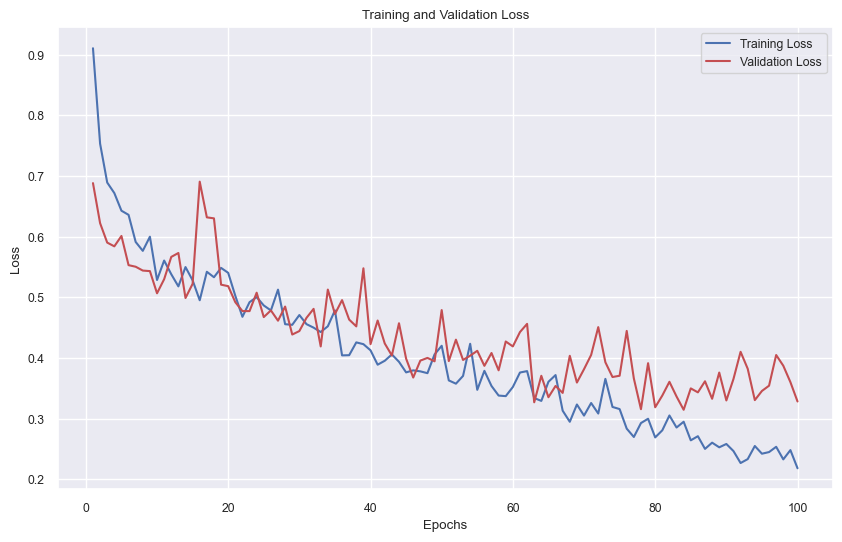

In [105]:
# 손실과 검증 손실 값 가져오기
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

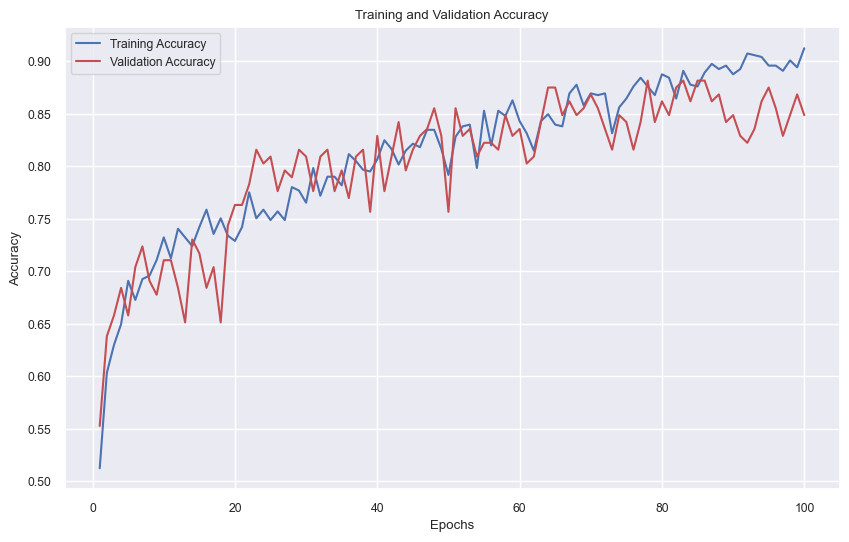

In [106]:
# 정확도와 검증 정확도 값 가져오기
acc = history.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [107]:
model.evaluate(X_test , y_test)

6/6 [==============================] - 0s 49ms/step - loss: 0.5030 - accuracy: 0.7895


[0.5029962062835693, 0.7894737124443054]

2024-10-01 14:08:47.902387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 47ms/step
[[107  14]
 [ 26  43]]
0.7894736842105263
0.7844216841315887
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       121
           1       0.75      0.62      0.68        69

    accuracy                           0.79       190
   macro avg       0.78      0.75      0.76       190
weighted avg       0.79      0.79      0.78       190



<Axes: >

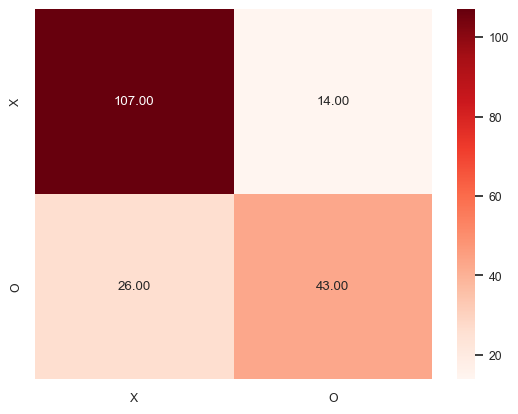

In [108]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['X', 'O']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="Reds", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

### 앞에서 만든 CNN모델에서 풀력층을 제외하고 저장하는 코드

In [109]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


# 마지막 Dense 층 제거
model.pop()

# 제거 후의 모델 구조 확인
print("After removing the last layer:")
model.summary()

# 모델 컴파일 (재컴파일 필요)
# 컴파일은 훈련을 위한 것이며, 저장에는 필수적이지 않지만 모델을 사용하려면 필요
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 저장
model_file_path = './CNN_without_last_layer.h5'
model.save(model_file_path)
print(f"Model saved at {model_file_path}")

After removing the last layer:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 32)             800       
                                                                 
 batch_normalization_8 (Batc  (None, 7, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 7, 32)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             4160      
                                                                 
 batch_normalization_9 (Batc  (None, 6, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)   

In [110]:
from tensorflow.keras.models import load_model

base_model = load_model(model_file_path)

In [111]:
print("Number of layers in the base model: ", len(base_model.layers))


Number of layers in the base model:  12


In [112]:
base_model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 7, 32)             800       
                                                                 
 batch_normalization_8 (Batc  (None, 7, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 7, 32)             0         
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             4160      
                                                                 
 batch_normalization_9 (Batc  (None, 6, 64)            256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 6, 64)            

### base_model이후에 Dense_layer를 추가하여 Pre-trained model학습


In [113]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# 기존 모델의 층을 동결 (학습되지 않도록 설정)
base_model.trainable = False

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(128, activation='tanh'))  # 기존 출력층 앞의 레이어 대신 추가

new_model.add(layers.Dense(256, activation='tanh'))

new_model.add(layers.Dense(128, activation='tanh'))
# 최종 출력층 추가 
new_model.add(layers.Dense(1, activation='sigmoid'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 128)               104928    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dense_23 (Dense)            (None, 256)               33024     
                                                                 
 dense_24 (Dense)            (None, 128)               32896     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 187,489
Trainable params: 82,561
Non-trainable params: 104,928
_________________________________________________________________


In [114]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.sequential.Sequential object at ...,sequential_6,False
1,<keras.layers.core.dense.Dense object at 0x36b...,dense_22,True
2,<keras.layers.core.dense.Dense object at 0x357...,dense_23,True
3,<keras.layers.core.dense.Dense object at 0x358...,dense_24,True
4,<keras.layers.core.dense.Dense object at 0x30f...,dense_25,True


In [115]:
batch_size = 64

train_epochs = 100
history3 = new_model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-10-01 14:08:49.121567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.4072 - accuracy: 0.7967

2024-10-01 14:08:51.329978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 3s 247ms/step - loss: 0.4072 - accuracy: 0.7967 - val_loss: 0.3566 - val_accuracy: 0.8684
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2877 - accuracy: 0.8793 - val_loss: 0.3478 - val_accuracy: 0.8947
Epoch 3/100
10/10 [==============================] - 0s 13ms/step - loss: 0.2522 - accuracy: 0.8942 - val_loss: 0.3350 - val_accuracy: 0.8816
Epoch 4/100
10/10 [==============================] - 0s 12ms/step - loss: 0.2455 - accuracy: 0.9058 - val_loss: 0.3464 - val_accuracy: 0.8750
Epoch 5/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2053 - accuracy: 0.9074 - val_loss: 0.3775 - val_accuracy: 0.8816
Epoch 6/100
10/10 [==============================] - 0s 14ms/step - loss: 0.2263 - accuracy: 0.8942 - val_loss: 0.3850 - val_accuracy: 0.8684
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 0.2530 - accuracy: 0.9008 - val_loss: 0.4187 - val_accuracy: 0.8618
Epoch 8/100
10/10

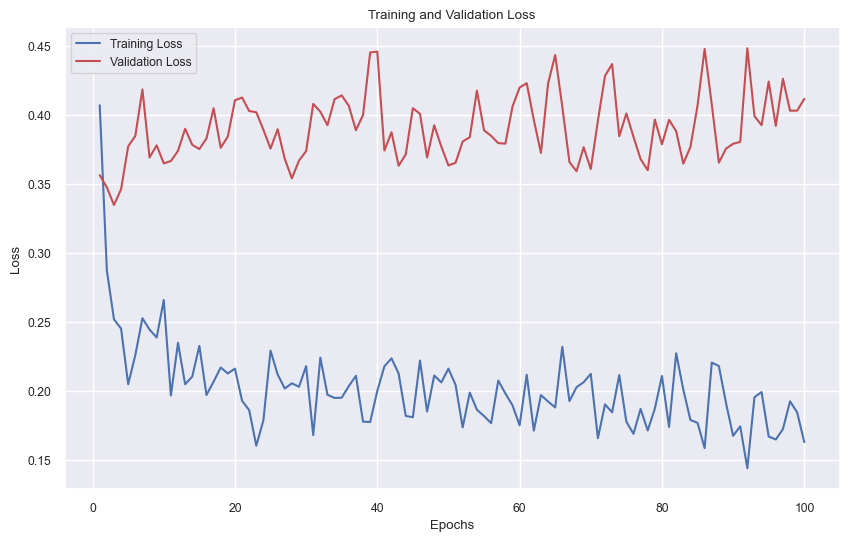

In [116]:
# 손실과 검증 손실 값 가져오기
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


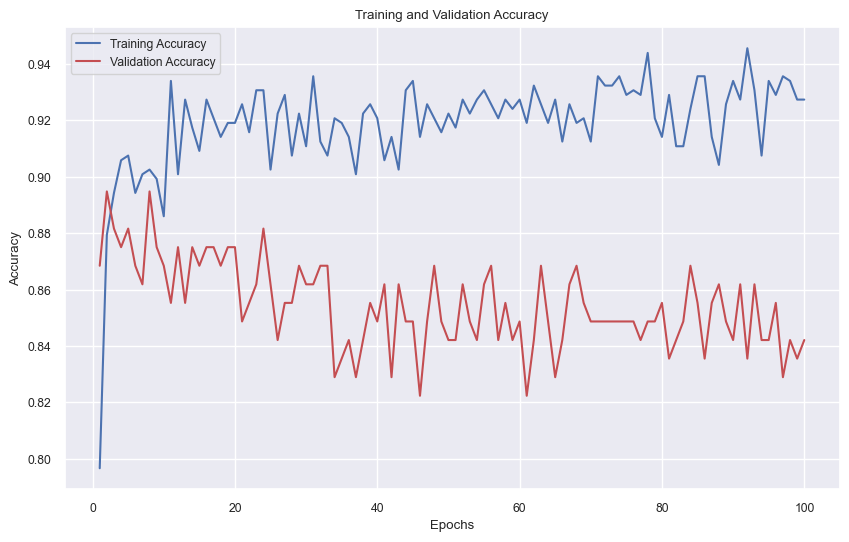

In [117]:
# 정확도와 검증 정확도 값 가져오기
acc = history3.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history3.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [118]:
new_model.evaluate(X_test , y_test)

6/6 [==============================] - 0s 58ms/step - loss: 0.6232 - accuracy: 0.7737


[0.6231944561004639, 0.7736842036247253]

2024-10-01 14:09:03.176168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 0s 35ms/step
[[98 23]
 [20 49]]
Accuracy: 0.7736842105263158
F1 Score: 0.7746714333238063
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.68      0.71      0.70        69

    accuracy                           0.77       190
   macro avg       0.76      0.76      0.76       190
weighted avg       0.78      0.77      0.77       190



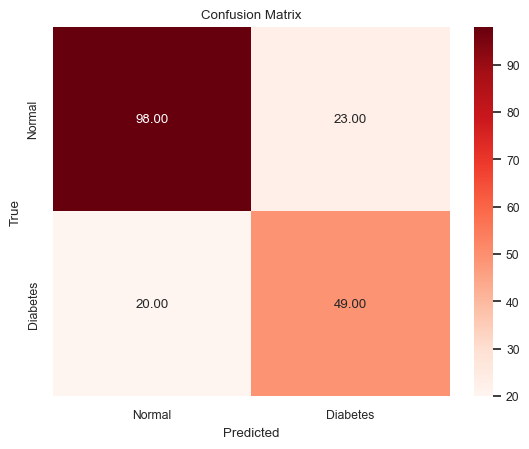

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np

# 모델이 예측한 값 (클래스 1의 확률값)
predy = new_model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)  # 확률을 이진 값으로 변환

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)  # y_test는 이진 레이블이어야 함
print(cm)
print("Accuracy:", accuracy_score(y_test, predy))
print("F1 Score:", f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, cmap="Reds", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## 기존모델을 동결하지 않고 Fine-Tuning

In [120]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# 기존 모델의 층을 동결 
base_model.trainable = True

# 새로운 모델을 정의
new_model = Sequential()

# 기존 모델을 추가
new_model.add(base_model)

# 새로운 완전연결층 추가
new_model.add(layers.Dense(128, activation='tanh'))  # 기존 출력층 앞의 레이어 대신 추가

new_model.add(layers.Dense(256, activation='tanh'))

new_model.add(layers.Dense(128, activation='tanh'))
# 최종 출력층 추가 
new_model.add(layers.Dense(1, activation='sigmoid'))

new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 모델 요약 출력
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 128)               104928    
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 dense_29 (Dense)            (None, 1)                 129       
                                                                 
Total params: 187,489
Trainable params: 186,785
Non-trainable params: 704
_________________________________________________________________


In [121]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.sequential.Sequential object at ...,sequential_6,True
1,<keras.layers.core.dense.Dense object at 0x30c...,dense_26,True
2,<keras.layers.core.dense.Dense object at 0x381...,dense_27,True
3,<keras.layers.core.dense.Dense object at 0x381...,dense_28,True
4,<keras.layers.core.dense.Dense object at 0x35c...,dense_29,True


In [122]:
batch_size = 64

train_epochs = 100
history4 = new_model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100


2024-10-01 14:09:04.350655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 0.3950 - accuracy: 0.8149

2024-10-01 14:09:08.960965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 6s 315ms/step - loss: 0.3950 - accuracy: 0.8149 - val_loss: 0.5135 - val_accuracy: 0.7961
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 0.3073 - accuracy: 0.8711 - val_loss: 0.5021 - val_accuracy: 0.8421
Epoch 3/100
10/10 [==============================] - 0s 21ms/step - loss: 0.3116 - accuracy: 0.8661 - val_loss: 0.3746 - val_accuracy: 0.8553
Epoch 4/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2422 - accuracy: 0.8909 - val_loss: 0.3697 - val_accuracy: 0.8684
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2758 - accuracy: 0.8992 - val_loss: 0.3804 - val_accuracy: 0.8816
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2537 - accuracy: 0.8843 - val_loss: 0.3807 - val_accuracy: 0.8421
Epoch 7/100
10/10 [==============================] - 0s 17ms/step - loss: 0.2604 - accuracy: 0.9008 - val_loss: 0.3390 - val_accuracy: 0.8684
Epoch 8/100
10/10

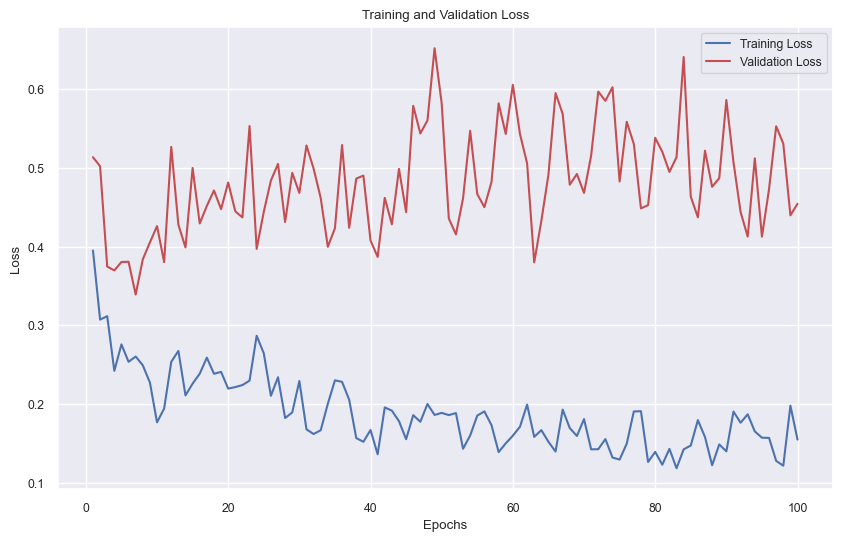

In [123]:
# 손실과 검증 손실 값 가져오기
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(1, len(loss) + 1)

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


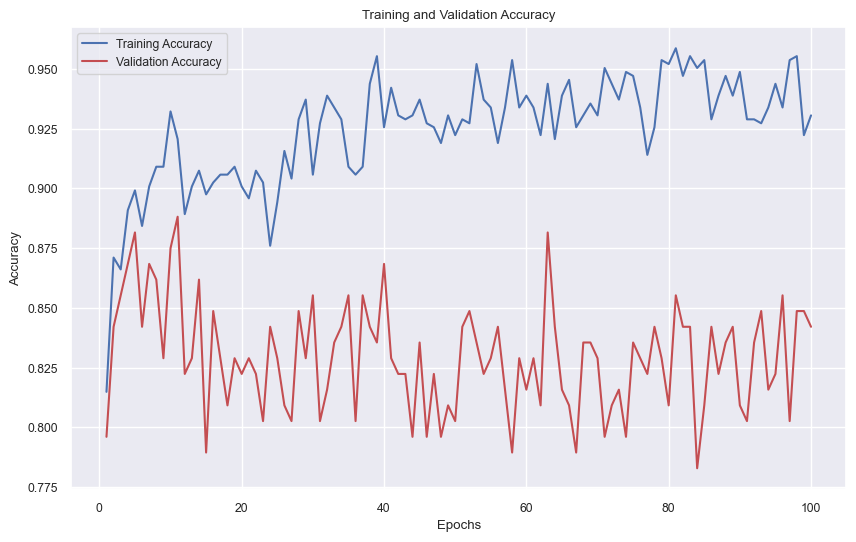

In [124]:
# 정확도와 검증 정확도 값 가져오기
acc = history4.history['accuracy']  # 또는 'acc' 키 사용 (버전에 따라 다름)
val_acc = history4.history['val_accuracy']
epochs = range(1, len(acc) + 1)

# 정확도 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')  # y축 라벨을 'Accuracy'로 수정
plt.legend()

plt.show()

In [125]:
new_model.evaluate(X_test , y_test)

6/6 [==============================] - 1s 63ms/step - loss: 0.4366 - accuracy: 0.8263


[0.4365743398666382, 0.8263157606124878]

2024-10-01 14:09:27.073358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 64ms/step
[[102  19]
 [ 14  55]]
Accuracy: 0.8263157894736842
F1 Score: 0.8275201147952647
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       121
           1       0.74      0.80      0.77        69

    accuracy                           0.83       190
   macro avg       0.81      0.82      0.81       190
weighted avg       0.83      0.83      0.83       190



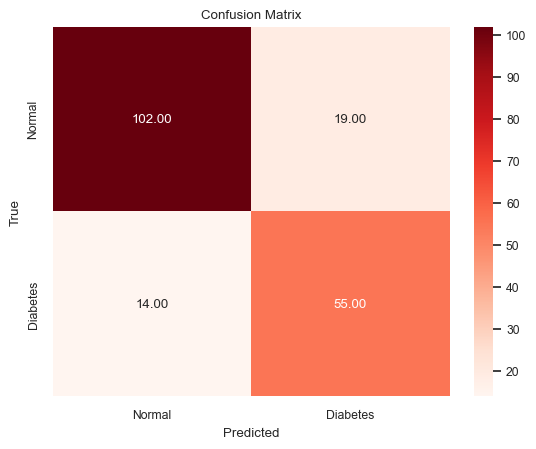

In [126]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import numpy as np

# 모델이 예측한 값 (클래스 1의 확률값)
predy = new_model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)  # 확률을 이진 값으로 변환

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)  # y_test는 이진 레이블이어야 함
print(cm)
print("Accuracy:", accuracy_score(y_test, predy))
print("F1 Score:", f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, cmap="Reds", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()